In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import statistics
%matplotlib inline

# Анализ данных

## Урок 1. Введение в анализ данных

In [2]:
football = pd.read_csv('C:/Users/Xiaomi/Downloads/football.csv')

In [3]:
football

,Unnamed: 0,Name,Age,Nationality,Club,Value,Wage,Position,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,L. Messi,31,Argentina,FC Barcelona,110500000,565000,RF,84,95,...,75,96,33,28,26,6,11,15,14,8
1,1,Cristiano Ronaldo,33,Portugal,Juventus,77000000,405000,ST,84,94,...,85,95,28,31,23,7,11,15,14,11
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,118500000,290000,LW,79,87,...,81,94,27,24,33,9,9,15,15,11
3,3,De Gea,27,Spain,Manchester United,72000000,260000,GK,17,13,...,40,68,15,21,13,90,85,87,88,94
4,4,K. De Bruyne,27,Belgium,Manchester City,102000000,355000,RCM,93,82,...,79,88,68,58,51,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12892,13121,J. Lundstram,19,England,Crewe Alexandra,1100000,1000,CM,34,38,...,43,45,40,48,47,10,13,7,8,9
12893,13122,N. Christoffersson,19,Sweden,Trelleborgs FF,60000,1000,ST,23,52,...,43,42,22,15,19,10,9,9,5,12
12894,13123,B. Worman,16,England,Cambridge United,60000,1000,ST,25,40,...,55,41,32,13,11,6,5,10,6,13
12895,13124,D. Walker-Rice,17,England,Tranmere Rovers,60000,1000,RW,44,50,...,50,46,20,25,27,14,6,14,8,9


In [4]:
#Средняя скорость футболистов, зарплата выше среднего
round(football[football.Wage > football.Wage.mean()].SprintSpeed.mean(), 2)

67.57

In [5]:
#Средняя скорость футболистов, зарплата ниже среднего
round(football[football.Wage < football.Wage.mean()].SprintSpeed.mean(), 2)

62.41

In [6]:
football[(football.Composure > 0.9 * football.Composure.max()) & (football.Reactions > 0.9 * football.Reactions.max())].Age.min()

24

In [7]:
football.Nationality.mode()

0    England
dtype: object

In [8]:
#Каждая национальность в процентах в датафрейме
football['Nationality'].value_counts(normalize = True)

England      0.106071
Germany      0.071257
Spain        0.052028
France       0.047608
Argentina    0.044506
               ...   
Andorra      0.000078
Rwanda       0.000078
Bermuda      0.000078
Indonesia    0.000078
Ethiopia     0.000078
Name: Nationality, Length: 156, dtype: float64

In [9]:
#Самая большая зарплата
football[football.Wage == football.Wage.max()]

,Unnamed: 0,Name,Age,Nationality,Club,Value,Wage,Position,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,L. Messi,31,Argentina,FC Barcelona,110500000,565000,RF,84,95,...,75,96,33,28,26,6,11,15,14,8


In [10]:
#Клубы с самыми высокими зарплатами 
football.groupby(['Club']).Wage.sum().sort_values(ascending = False).head()

Club
Real Madrid          4138000
FC Barcelona         3967000
Manchester City      3097000
Manchester United    2357000
Juventus             2335000
Name: Wage, dtype: int64

In [11]:
len(football.Club.unique())

650

In [12]:
#Клубы чьи игроки в датасете встречаются наибольшее количество раз
football.groupby(['Club']).Name.count().sort_values(ascending = False).index[0]

'Shonan Bellmare'

In [13]:
football.groupby(['Club']).Wage.sum().loc['Chelsea']

2035000

In [14]:
#Сводная таблица по двум клубам и зарплатам каждой национальности
football[football.Club.isin(['Real Madrid', 'FC Barcelona'])].pivot_table(values = ['Wage'], 
                                                                          index = ['Nationality'],
                                                                          columns = ['Club'], 
                                                                          aggfunc = 'sum',
                                                                          margins = True,
                                                                          fill_value = 0)

Wage                     
Club               FC Barcelona Real Madrid      All
Nationality                                         
Argentina                565000           0   565000
Belgium                  110000      240000   350000
Brazil                   465000      570000  1035000
Chile                    205000           0   205000
Costa Rica                    0      195000   195000
Croatia                  260000      420000   680000
Dominican Republic            0      140000   140000
France                   495000      459000   954000
Germany                  240000      355000   595000
Netherlands              135000           0   135000
Portugal                 125000           0   125000
Spain                    912000     1404000  2316000
Uruguay                  455000           0   455000
Wales                         0      355000   355000
All                     3967000     4138000  8105000

In [15]:
#Максимальная зарплата голкипера Манчестер Сити
df2 = football.pivot_table(columns = 'Position', index = 'Club', values = 'Wage', aggfunc = 'max', fill_value = 0)
df2.loc['Manchester City']['GK']

125000

In [16]:
#Сколько получают русские играющие за AS Monaco
df2 = football.pivot_table(columns = 'Nationality', index = 'Club', values = 'Wage', aggfunc = 'sum', fill_value = 0)
df2.loc['AS Monaco']['Russia']

61000

In [17]:
#Три клуба с самыми быстрыми ST
df2 = football.pivot_table(columns = 'Position', index = 'Club', values = 'SprintSpeed', aggfunc = 'mean', fill_value = 0)
df2.ST.sort_values(ascending = False)[0:3]

Club
Vitória      91.0
Sydney FC    88.0
CD Lugo      87.0
Name: ST, dtype: float64

In [18]:
#Число уникальных стран из клуба Манчестер Юнайтед
football[football.Club == 'Manchester United'].Nationality.nunique()

13

In [19]:
football[(football.Nationality == 'Argentina') & (football.Age == 20 ) & (football.Wage == 54000)]

,Unnamed: 0,Name,Age,Nationality,Club,Value,Wage,Position,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
356,358,L. Martínez,20,Argentina,Inter,18000000,54000,ST,56,82,...,59,77,46,22,25,11,8,8,8,13


In [20]:
#Какое количество вратарей в среднем играет за один клуб
round(football.pivot_table(columns = 'Position', index = 'Club', values = 'Name', aggfunc = 'count', fill_value = 0).describe().GK.iloc[1], 3)

2.525

## Урок 2. Работа с таблицами и подготовка данных

In [21]:
ratings = pd.read_csv('C:/Users/Xiaomi/Downloads/ratings.csv')
movies = pd.read_csv('C:/Users/Xiaomi/Downloads/movies.csv')

In [22]:
#Преобразование времени к нормальному виду
time = pd.to_datetime(ratings.timestamp, unit = 's')
ratings.timestamp = time
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [23]:
#Группировка двух таблиц
joined = ratings.merge(movies, on = 'movieId', how = 'left')
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [24]:
#Удаление дубликатов
movies.drop_duplicates(subset = 'movieId', keep = 'first', inplace = True)

## Урок 3. Визуализация данных

In [25]:
restaurant = pd.read_csv('C:/Users/Xiaomi/Downloads/restaurant.csv')
restaurant.head()

,total_bill,tip,sex,vegan,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


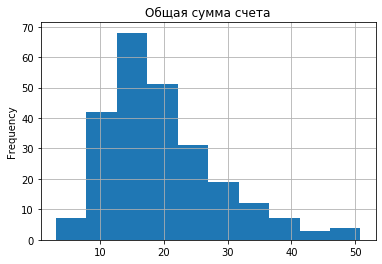

In [26]:
restaurant.total_bill.plot(kind = 'hist', grid = True, title = 'Общая сумма счета')

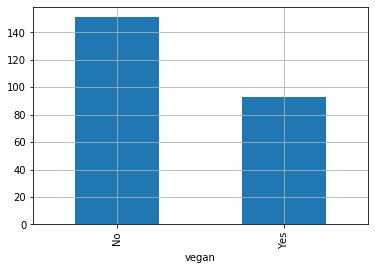

In [27]:
#Чаевые 
restaurant.groupby('vegan')['tip'].count().plot(kind = 'bar', grid = True)

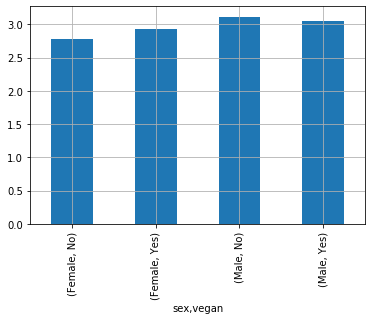

In [28]:
restaurant.groupby(by = ['sex', 'vegan'])['tip'].mean().plot(kind = 'bar', grid= True)

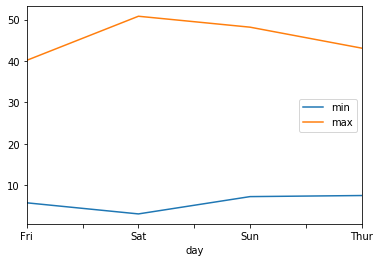

In [29]:
restaurant.groupby(by = 'day')['total_bill'].agg(['min','max']).plot()

## Урок 4. Линейная алгебра с NumPy

In [30]:
my_secret = [x for x in range(1, 301, 7) if x%10 == 7 or x%10 == 1]
np.array([my_secret, [x/2 for x in my_secret], [x-100 for x in my_secret]])

array([[  1. ,  57. ,  71. , 127. , 141. , 197. , 211. , 267. , 281. ],
       [  0.5,  28.5,  35.5,  63.5,  70.5,  98.5, 105.5, 133.5, 140.5],
       [-99. , -43. , -29. ,  27. ,  41. ,  97. , 111. , 167. , 181. ]])

In [31]:
np.matrix(['8 13 18 4; 25 3 18 28; 14 15 18 24; 1 2 3 4'])

matrix([['8 13 18 4; 25 3 18 28; 14 15 18 24; 1 2 3 4']], dtype='<U43')

## Урок 5. Статистика и теория вероятности 

In [33]:
correlation = restaurant.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


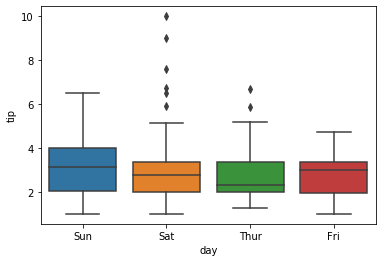

In [47]:
sns.boxplot(x = 'day', y = 'tip', data = restaurant)

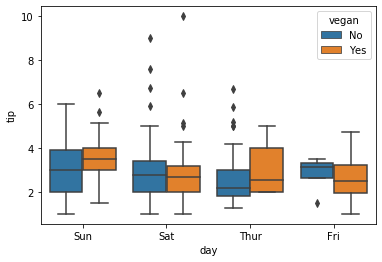

In [49]:
sns.boxplot(x = 'day', y = 'tip', data = restaurant, hue = 'vegan')